# ANP Row Sensitivity Graphing

In [1]:
import numpy as np

In [2]:
import pyanp.rowsens as rs
import pyanp.limitmatrix as lm
from pyanp.general import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (12,7)

In [4]:
mat = np.array([
    [0.2, 0.25, 0.05, 0.18],
    [0.3, 0.3, 0.25, 0.07],
    [0.4, 0.3, 0.5, 0.3],
    [0.1, 0.15, 0.2, 0.45]
])


# Manually Creating the graph
Do not worry, we have a simpler function to create this graph, see the next section

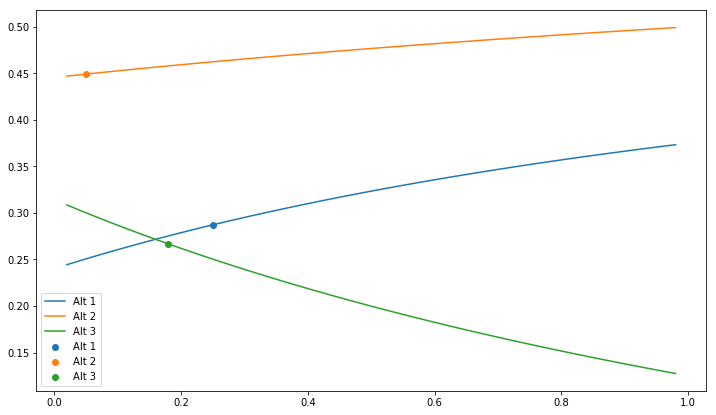

In [5]:
xs = [i/50 for i in range(1,50)]
row = 0
alts = [1,2,3]
for alt in alts:
    row=0
    ys = []
    for x in xs:
        new_mat = rs.row_adjust(mat, row, x)
        new_lmt = lm.calculus(new_mat)
        new_pri = lm.priority_from_limit(new_lmt)
        new_pri[row]=0
        new_pri /= sum(new_pri)
        y = new_pri[alt]
        ys.append(y)
    label = "Alt "+str(alt)
    plt.plot(xs,ys, label=label)
    x = mat[row,alt]
    y = linear_interpolate(xs, ys, x)
    plt.scatter(x, y, label=label)
plt.legend()
plt.show()

# Use `influence_table()` function to graph

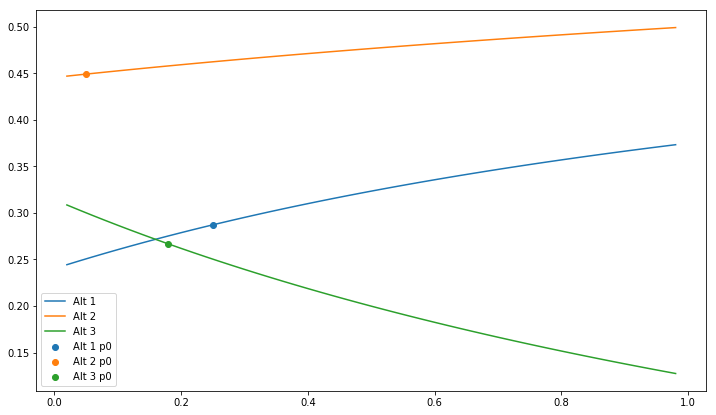

In [6]:
rs.influence_table(mat, 0)

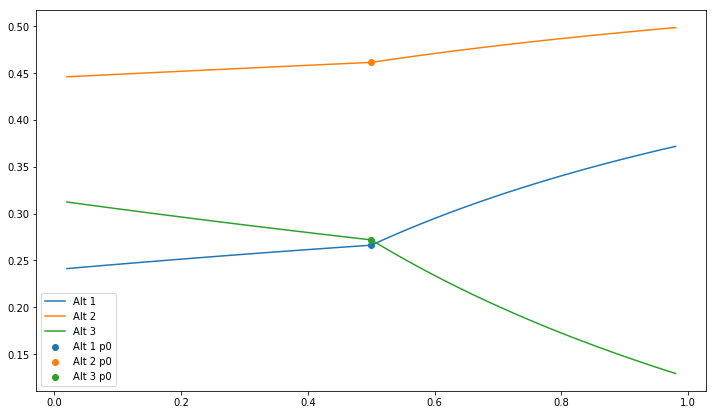

In [7]:
rs.influence_table(mat, row=0, p0mode=0.5)

In [17]:
df, p0s = rs.influence_table(mat, 0, graph=False)
#display(df)
display(p0s)

Alt 1    (0.25, 0.28719658811812154)
Alt 2     (0.05, 0.4491579660422425)
Alt 3    (0.18, 0.26674086592856733)
dtype: object

Alt 1    (0.12938406595662771, 0.2661976075307106)
Alt 2    (0.23468204680615523, 0.4616621842136241)
Alt 3    (0.15790121834673215, 0.2720505453528627)
dtype: object

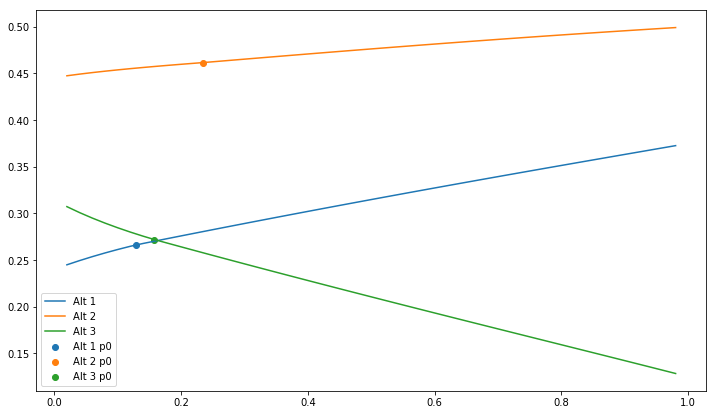

In [9]:
df, p0s = rs.influence_table(mat, 0, graph=False, p0mode=0)
display(p0s)
rs.influence_table_plot(df, p0s)

# Limit calc

In [10]:
limit, p0s=rs.influence_limit(mat, 0, delta=1e-7)
display(limit)
display(p0s)

Alt 1    0.375000
Alt 2    0.461644
Alt 3    0.272016
dtype: float64

Alt 1    0.5
Alt 2    0.5
Alt 3    0.5
dtype: float64

In [11]:
limit, p0s=rs.influence_limit(mat, 0, p0mode=0.15, delta=1e-7)
display(limit)
display(p0s)

Alt 1    0.375000
Alt 2    0.461644
Alt 3    0.272016
dtype: float64

Alt 1    0.15
Alt 2    0.15
Alt 3    0.15
dtype: float64

# Fixed distance influence

In [12]:
rs.influence_fixed(mat, 0)

1    0.063952
2    0.021766
3   -0.085719
dtype: float64

In [13]:
rs.influence_fixed(mat, 0, delta=-0.25)

1   -0.012273
2   -0.007901
3    0.020175
dtype: float64

In [14]:
rs.influence_fixed(mat, 1)

0    0.088769
2   -0.036457
3   -0.052312
dtype: float64

# Rank Influence simple

In [15]:
influences = [rs.influence_rank(mat, i) for i in range(len(mat))]
influences

[0.9841769522094728, 0.625724648742676, 0.9091662454223632, 0.6491006460571289]